# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.854868e+01     1.433157e+01
 * time: 0.0017590522766113281
     1     3.111423e+01     6.499584e+00
 * time: 0.0477139949798584
     2     2.782100e+01     6.943128e+00
 * time: 0.053375959396362305
     3     2.186439e+01     2.902131e+00
 * time: 0.05907702445983887
     4     2.024683e+01     2.019475e+00
 * time: 0.06492996215820312
     5     1.977815e+01     2.665423e+00
 * time: 0.0701138973236084
     6     1.921355e+01     1.806648e+00
 * time: 0.07629585266113281
     7     1.864676e+01     1.584931e+00
 * time: 0.08283591270446777
     8     1.806073e+01     1.314453e+00
 * time: 0.08800983428955078
     9     1.778479e+01     7.884786e-01
 * time: 0.09317398071289062
    10     1.762424e+01     6.816088e-01
 * time: 0.09841799736022949
    11     1.751969e+01     6.114141e-01
 * time: 0.10367798805236816
    12     1.745938e+01     4.125908e-01
 * time: 0.10885286331176758
    13     1.743886e+01     6.814061e-01
 * time

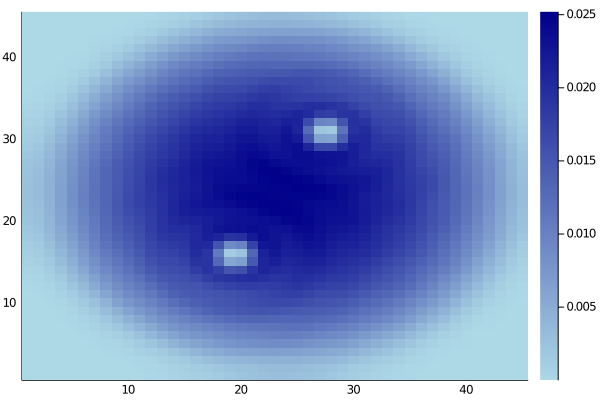

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)